In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.style.use("seaborn")
plt.style.use('fivethirtyeight')
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")


In [2]:
data1 = pd.read_csv("train_LZdllcl.csv")
data2 =pd.read_csv("test_2umaH9m.csv")

In [3]:
data1.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
data2.head(2)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51


In [5]:
data1.shape

(54808, 14)

In [6]:
data1.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [7]:
data1["education"].fillna("Bachelor's",inplace=True)
data1["education"].isna().sum()


0

In [8]:

data1_x=data1["previous_year_rating"].mean()
#data1["previous_year_rating"].replace(Nan,data1_x,inplace = True)
#data1["previous_year_rating"].fillna(method='ffill')
data1["previous_year_rating"].fillna(data1_x,inplace = True)

In [9]:
data1["previous_year_rating"].isna().sum()

0

In [10]:
data2["education"].fillna("Bachelor's",inplace=True)
data2["education"].isna().sum()

0

In [11]:
data2_x=data1["previous_year_rating"].mean()
data2["previous_year_rating"].fillna(data1_x,inplace = True)
data2["previous_year_rating"].isna().sum()

0

In [12]:
data1.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

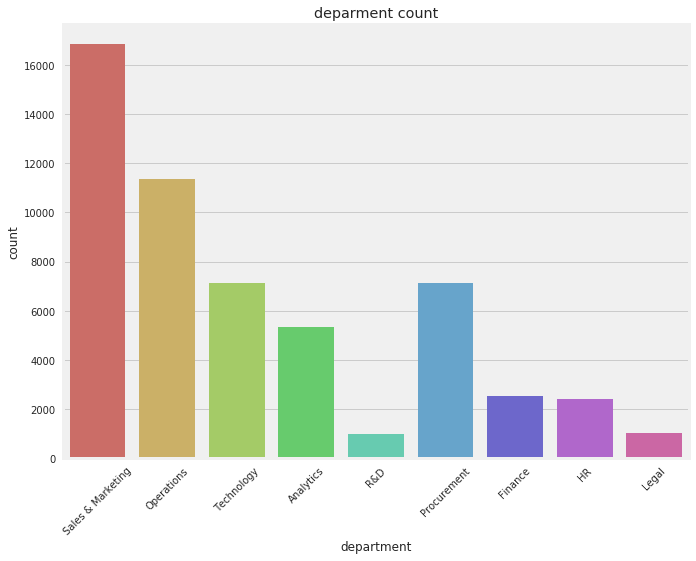

In [13]:
plt.figure(figsize=(10,8))
sns.countplot(x=data1["department"],data=data1,palette="hls")
sns.set_style("dark")
plt.xlabel("department")
plt.ylabel("count")
plt.title("deparment count")
plt.xticks(rotation=45)


In [14]:
data1["recruitment_channel"].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

In [15]:
data_dept = data1.groupby(["region","department"])["department"].count()
data_dept = pd.DataFrame(data_dept)
data_dept.columns =["sum"]
data_dept =data_dept.reset_index()
data_dept

,region,department,sum
0,region_1,Analytics,76
1,region_1,Finance,7
2,region_1,HR,7
3,region_1,Legal,1
4,region_1,Operations,61
...,...,...,...
287,region_9,Operations,34
288,region_9,Procurement,15
289,region_9,R&D,1
290,region_9,Sales & Marketing,243


In [16]:
#plt.figure(figsize=(16,8))
#data_dept.plot(kind="", x="department", y="region", alpha=0.4, figsize=(10,7), 
#         c="region" ,cmap="gist_heat_r", colorbar=True, sharex=False);
#plt.xticks(rotation=45)


In [17]:
data_dept_pro = data1.groupby(["recruitment_channel","is_promoted"])["is_promoted"].count()
data_dept_pro = pd.DataFrame(data_dept_pro)
data_dept_pro.columns = ["sum"]
data_dept_pro =data_dept_pro.reset_index()
data_dept_pro


,recruitment_channel,is_promoted,sum
0,other,0,27890
1,other,1,2556
2,referred,0,1004
3,referred,1,138
4,sourcing,0,21246
5,sourcing,1,1974


Text(0.5, 1.0, 'recruitment_channel vs is_promoted')

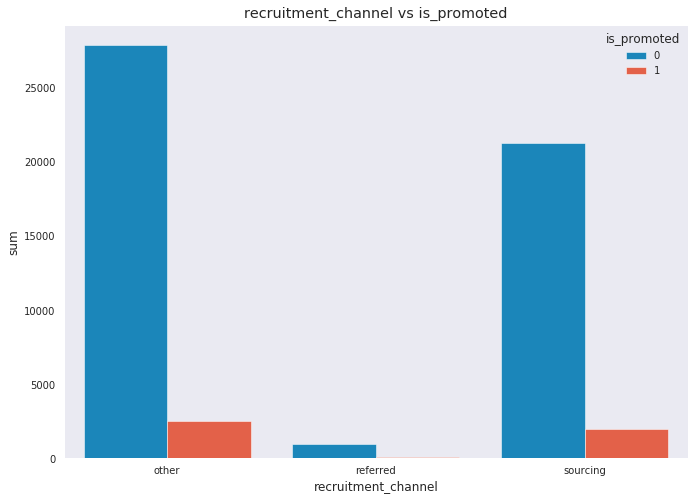

In [18]:
plt.figure(figsize=(10,8))
sns.barplot(x="recruitment_channel",hue="is_promoted",y="sum",data=data_dept_pro)
plt.title("recruitment_channel vs is_promoted")


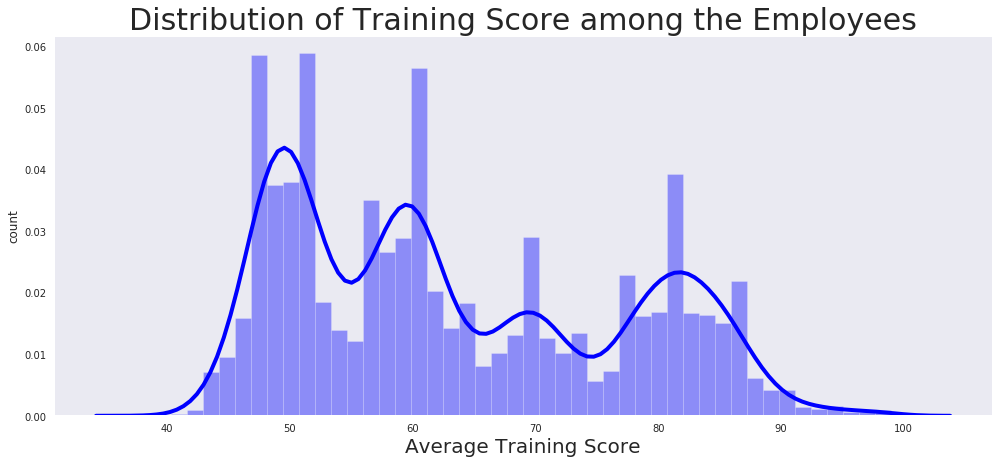

In [19]:
plt.rcParams['figure.figsize'] = (15, 7)
sns.distplot(data1['avg_training_score'], color = 'blue')
plt.title('Distribution of Training Score among the Employees', fontsize = 30)
plt.xlabel('Average Training Score', fontsize = 20)
plt.ylabel('count')
plt.show()

In [20]:
data1['awards_won?'].value_counts()


0    53538
1     1270
Name: awards_won?, dtype: int64

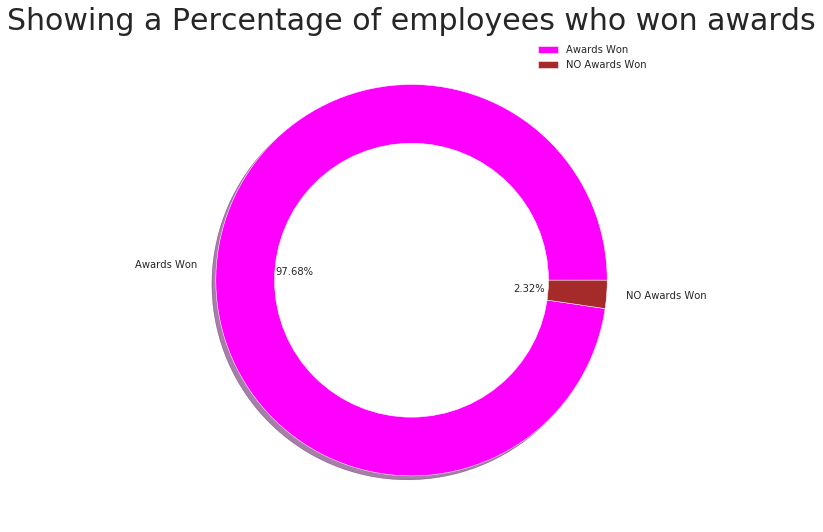

In [21]:
# plotting a donut chart for visualizing each of the recruitment channel's share

size = [53538,1270]
color =['magenta','brown']
labels = "Awards Won", "NO Awards Won"

my_circle = plt.Circle((0,0),0.7,color = 'white')
plt.rcParams['figure.figsize'] = (9,9)
plt.pie(size ,colors = color, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Showing a Percentage of employees who won awards', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

In [22]:
data1['KPIs_met >80%'].value_counts()


0    35517
1    19291
Name: KPIs_met >80%, dtype: int64

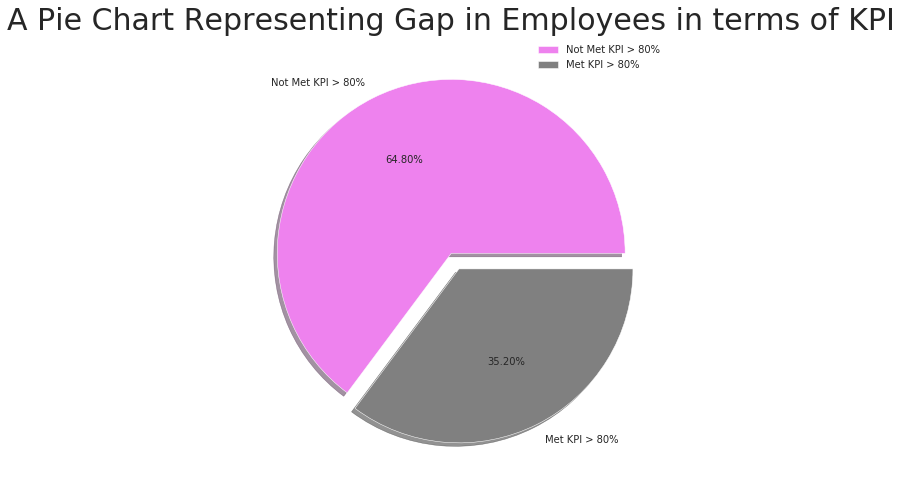

In [23]:
size = [35517, 19291]
labels = "Not Met KPI > 80%", "Met KPI > 80%"
colors = ['violet', 'grey']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('A Pie Chart Representing Gap in Employees in terms of KPI', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

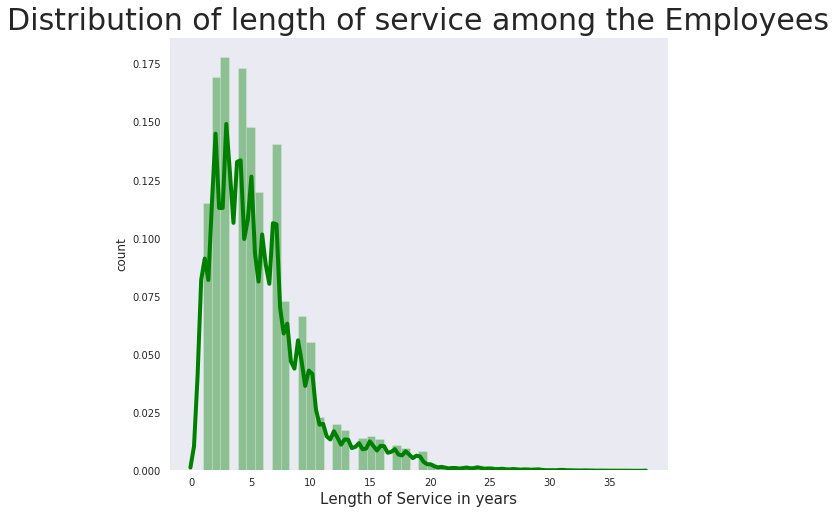

In [24]:
# checking the distribution of length of service

sns.distplot(data1['length_of_service'], color = 'green')
plt.title('Distribution of length of service among the Employees', fontsize = 30)
plt.xlabel('Length of Service in years', fontsize = 15)
plt.ylabel('count')
plt.show()

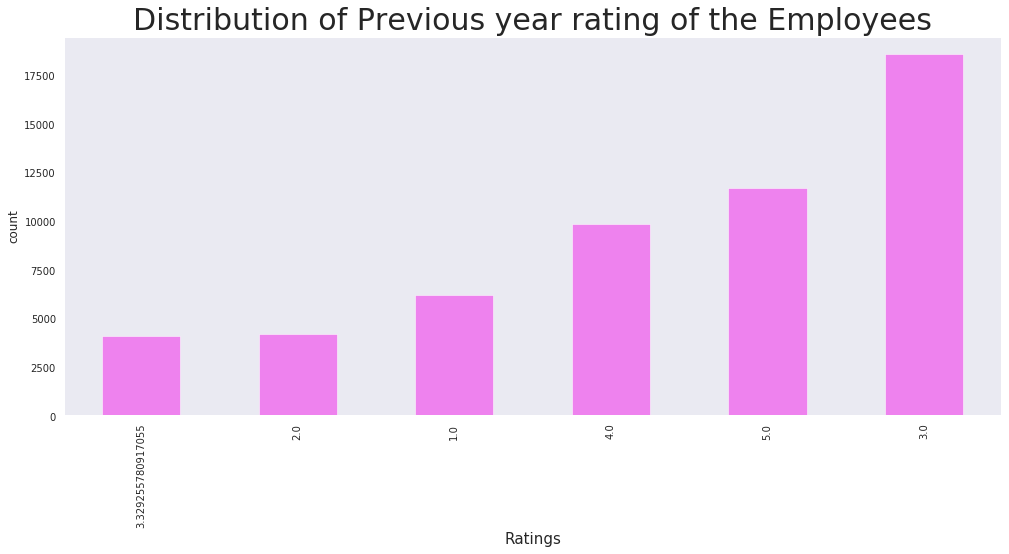

In [25]:
data1['previous_year_rating'].value_counts().sort_values().plot.bar(color = 'violet', figsize = (15, 7))
plt.title('Distribution of Previous year rating of the Employees', fontsize = 30)
plt.xlabel('Ratings', fontsize = 15)
plt.ylabel('count')
plt.show()

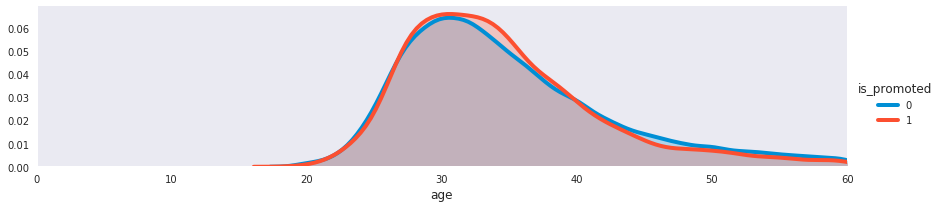

In [26]:
# checking the distribution of age of Employees in the company

facet = sns.FacetGrid(data1, hue="is_promoted",aspect=4)
facet.map(sns.kdeplot,'age',shade= True)
facet.set(xlim=(0, data1['age'].max()))
facet.add_legend()
 
plt.show() 

In [27]:
# checking the different no. of training done by the employees

data1["no_of_trainings"].value_counts()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
10        5
9         5
8         5
Name: no_of_trainings, dtype: int64

Text(0.5, 1.0, 'no. of training done by the employees')

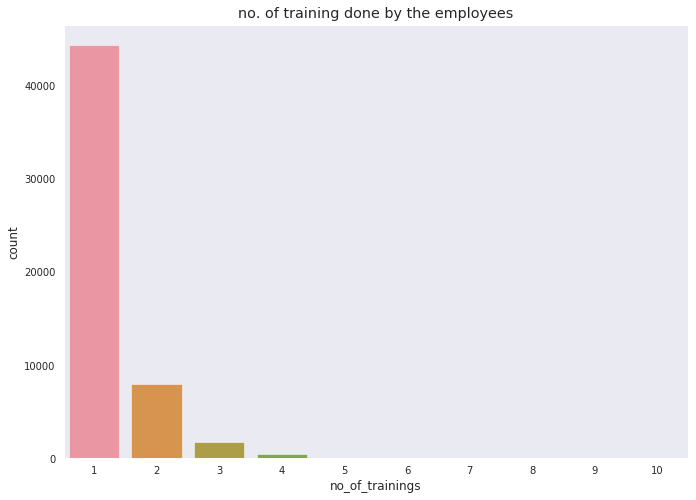

In [28]:
plt.figure(figsize=(10,8))
sns.countplot(x=data1["no_of_trainings"],data=data1)
plt.title("no. of training done by the employees")

In [29]:
# checing the most popular education degree among the employees

#

ModuleNotFoundError: No module named 'wordcloud'

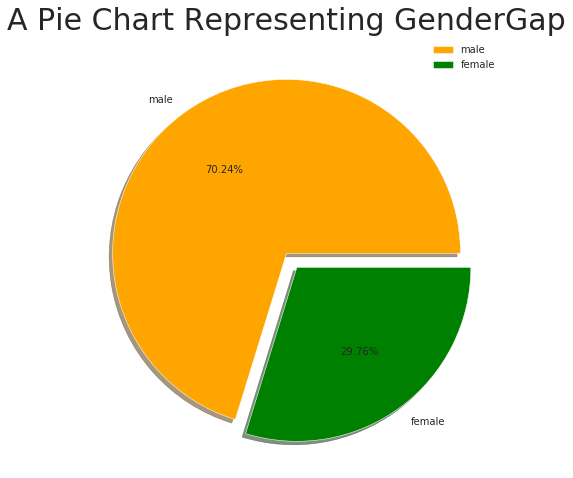

In [30]:
size = [38496, 16312]
color ='orange', 'green'
labels = ['male','female']
explode =[0.0,0.1]

plt.rcParams['figure.figsize'] =(8,8)
plt.pie(size,colors=color,labels=labels,explode=explode,shadow=True, autopct='%.2f%%')
plt.title('A Pie Chart Representing GenderGap', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

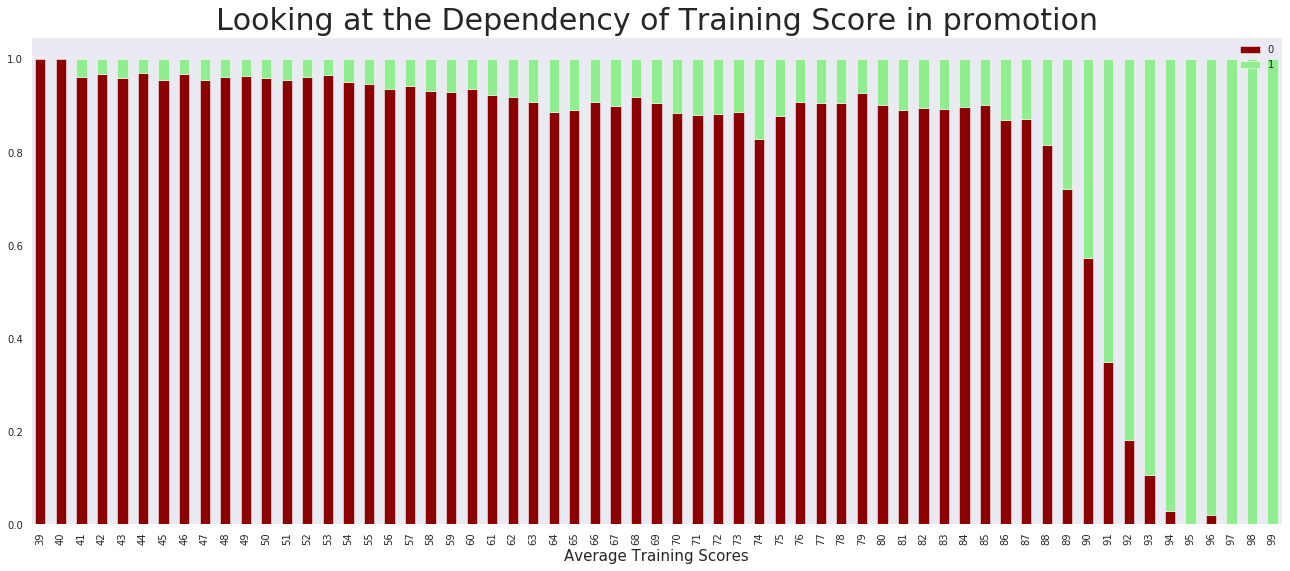

In [31]:
data = pd.crosstab(data1['avg_training_score'], data1['is_promoted'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 9), color = ['darkred', 'lightgreen'])

plt.title('Looking at the Dependency of Training Score in promotion', fontsize = 30)
plt.xlabel('Average Training Scores', fontsize = 15)
plt.legend()
plt.show()

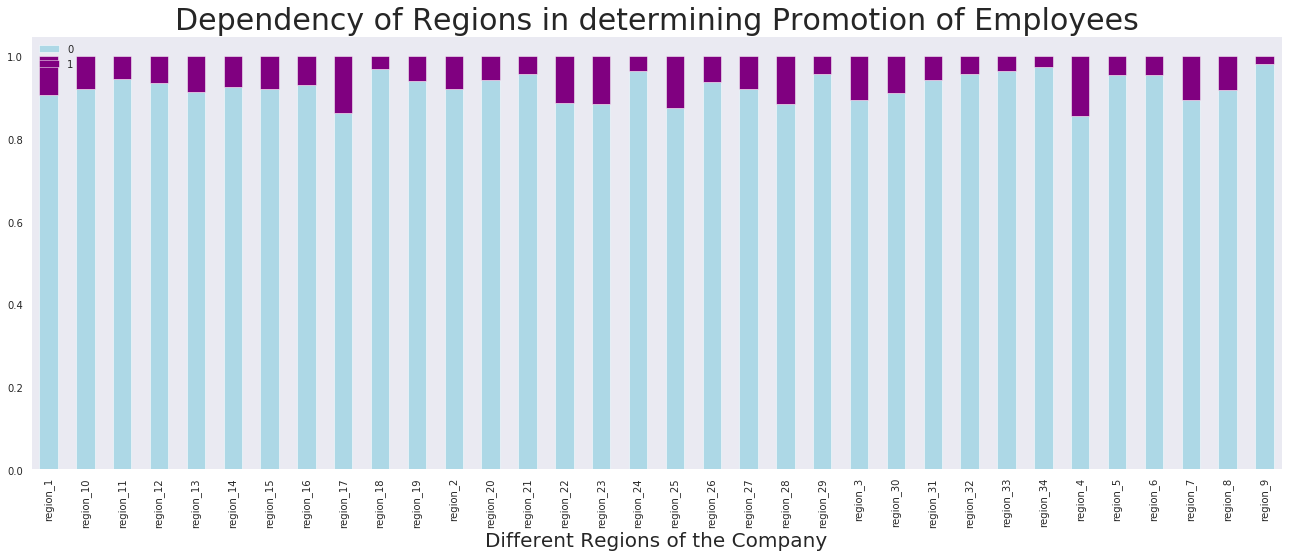

In [32]:
data = pd.crosstab(data1['region'], data1['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['lightblue', 'purple'])

plt.title('Dependency of Regions in determining Promotion of Employees', fontsize = 30)
plt.xlabel('Different Regions of the Company', fontsize = 20)
plt.legend()
plt.show()

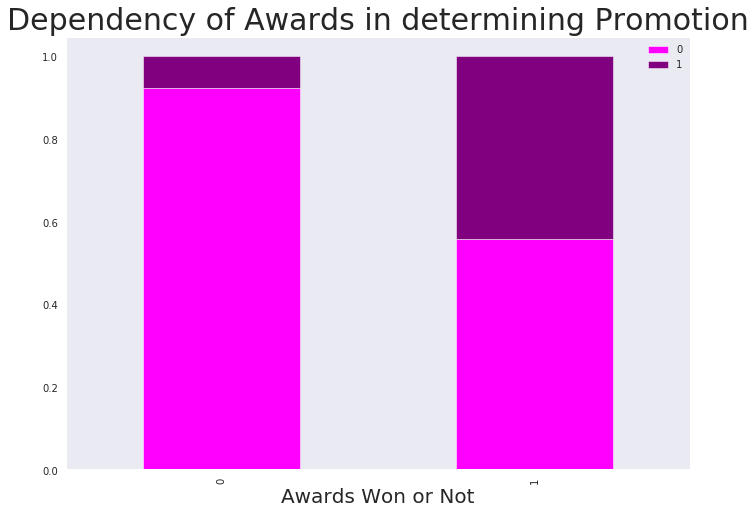

In [33]:
# dependency of awards won on promotion

data = pd.crosstab(data1['awards_won?'], data1['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 8), color = ['magenta', 'purple'])

plt.title('Dependency of Awards in determining Promotion', fontsize = 30)
plt.xlabel('Awards Won or Not', fontsize = 20)
plt.legend()
plt.show()

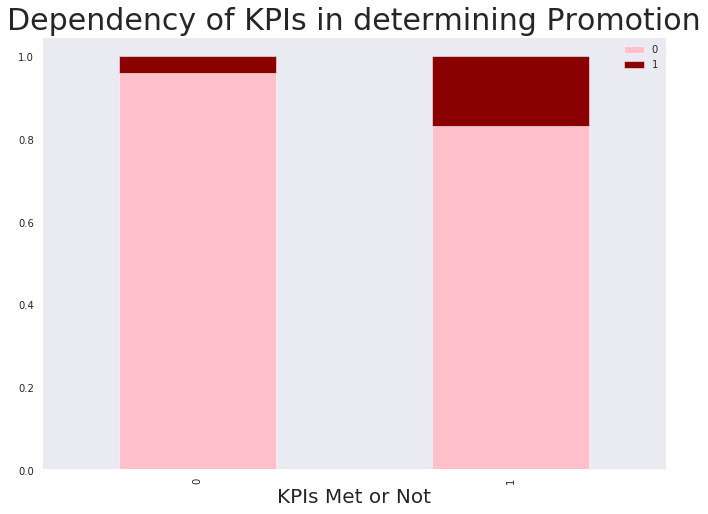

In [34]:
#dependency of KPIs with Promotion

data = pd.crosstab(data1['KPIs_met >80%'], data1['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 8), color = ['pink', 'darkred'])

plt.title('Dependency of KPIs in determining Promotion', fontsize = 30)
plt.xlabel('KPIs Met or Not', fontsize = 20)
plt.legend()
plt.show()


-- Again Having a good KPI score increases the chances of getting promoted in the company.



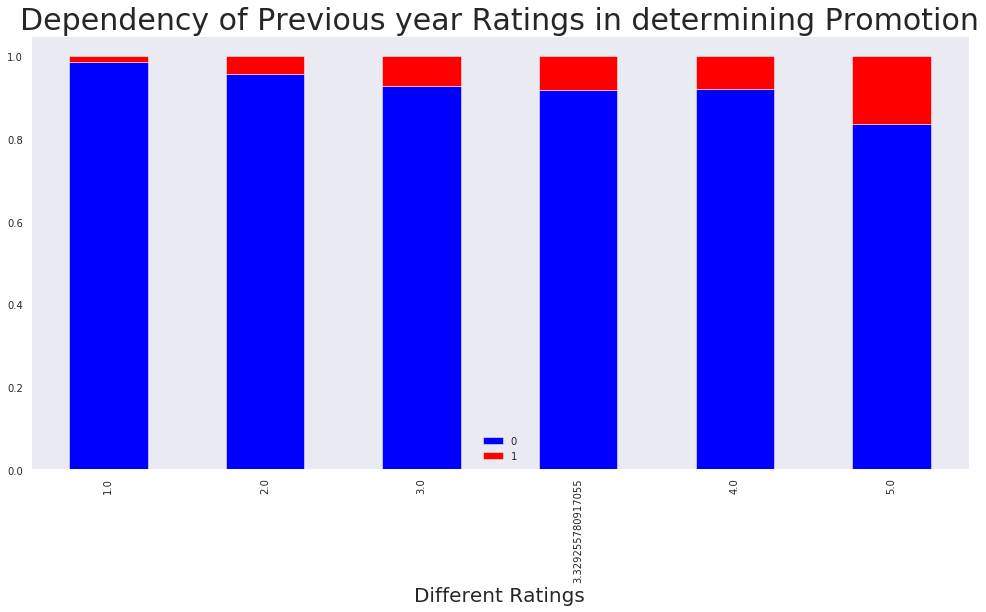

In [35]:
# checking dependency on previous years' ratings

data = pd.crosstab(data1['previous_year_rating'], data1['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 8), color = ['blue', 'red'])

plt.title('Dependency of Previous year Ratings in determining Promotion', fontsize = 30)
plt.xlabel('Different Ratings', fontsize = 20)
plt.legend()
plt.show()


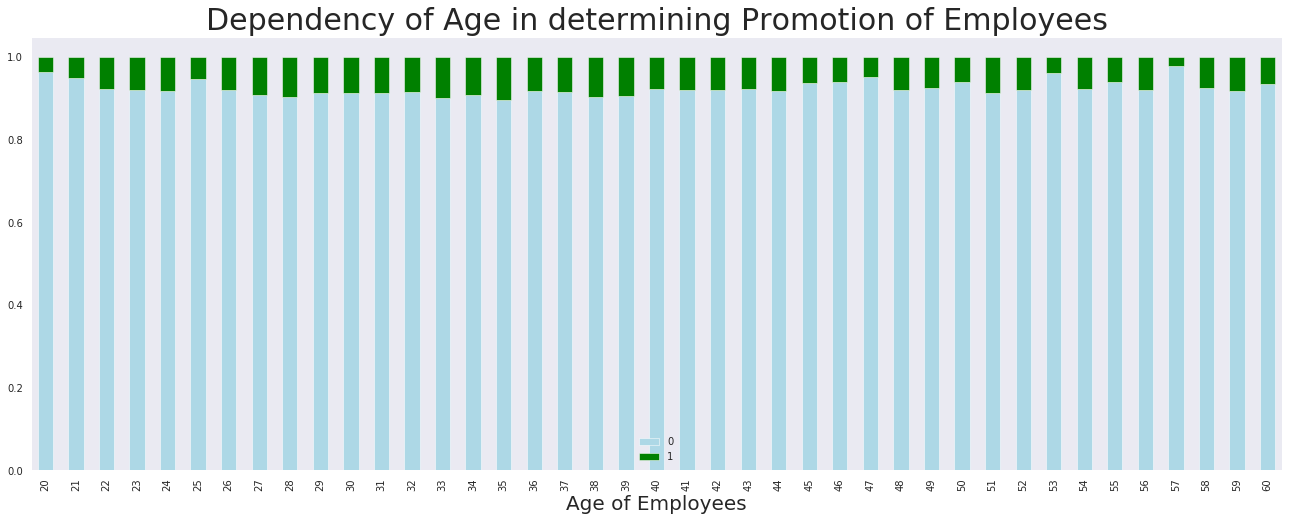

In [36]:
# checking dependency of age factor in promotion of employees

data = pd.crosstab(data1['age'], data1['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['lightblue', 'green'])

plt.title('Dependency of Age in determining Promotion of Employees', fontsize = 30)
plt.xlabel('Age of Employees', fontsize = 20)
plt.legend()
plt.show()

--This is Very Impressive that the company promotes employees of all the ages equally even the freshers have equal share of promotion and also the senior citizen employees are getting the equal share of Promotion in the Company



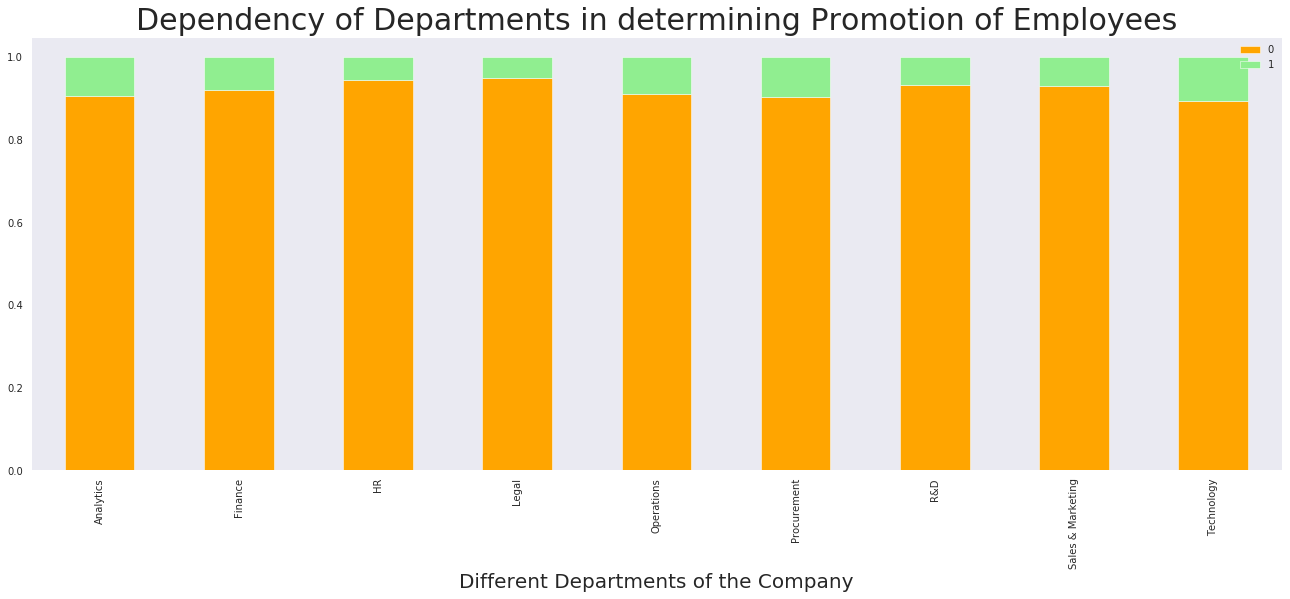

In [37]:
# checking which department got most number of promotions

data = pd.crosstab(data1['department'], data1['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['orange', 'lightgreen'])

plt.title('Dependency of Departments in determining Promotion of Employees', fontsize = 30)
plt.xlabel('Different Departments of the Company', fontsize = 20)
plt.legend()
plt.show()

Again, Each of the departments have equal no. of promotions showing an equal developement in each of the departments of the company.



In [38]:
data1["is_promoted"].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

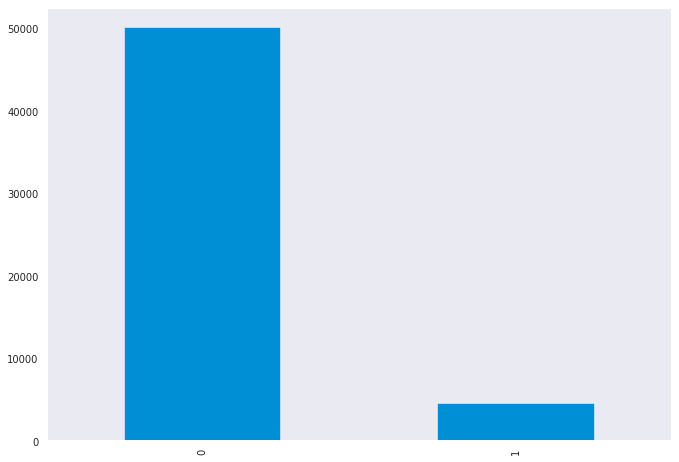

In [39]:
data1['is_promoted'].value_counts().plot(kind = "bar",figsize=(10,8))

In [40]:
# removing the employee_id column

data1 = data1.drop(['employee_id'], axis = 1)

data1.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [41]:
data2 = data2.drop(["employee_id"],axis=1)
data2.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
      dtype='object')

In [42]:
# defining the test set

x_test = data2

x_test.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
      dtype='object')

In [43]:
# one hot encoding for the test set
x_test = pd.get_dummies(x_test)
x_test.columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_region_1', 'region_region_10',
       'region_region_11', 'region_region_12', 'region_region_13',
       'region_region_14', 'region_region_15', 'region_region_16',
       'region_region_17', 'region_region_18', 'region_region_19',
       'region_region_2', 'region_region_20', 'region_region_21',
       'region_region_22', 'region_region_23', 'region_region_24',
       'region_region_25', 'region_region_26', 'region_region_27',
       'region_region_28', 'region_region_29', 'region_region_3',
       'region_region_30', 'region_region_31', 'region_region_32',
       'region_region_33', 'region_region_34', 'reg

In [57]:
x_test.shape

(23490, 58)

In [44]:
# splitting the train set into dependent and independent sets

x = data1.iloc[:, :-1]
y = data1.iloc[:, -1]

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (54808, 12)
Shape of y: (54808,)


In [45]:
x = pd.get_dummies(x)
x.columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_region_1', 'region_region_10',
       'region_region_11', 'region_region_12', 'region_region_13',
       'region_region_14', 'region_region_15', 'region_region_16',
       'region_region_17', 'region_region_18', 'region_region_19',
       'region_region_2', 'region_region_20', 'region_region_21',
       'region_region_22', 'region_region_23', 'region_region_24',
       'region_region_25', 'region_region_26', 'region_region_27',
       'region_region_28', 'region_region_29', 'region_region_3',
       'region_region_30', 'region_region_31', 'region_region_32',
       'region_region_33', 'region_region_34', 'reg

In [46]:
!pip install imblearn

In [47]:
from imblearn.over_sampling import SMOTE


In [48]:


x_sample, y_sample = SMOTE().fit_sample(x, y.values.ravel())

x_sample = pd.DataFrame(x_sample)
y_sample = pd.DataFrame(y_sample)

# checking the sizes of the sample data
print("Size of x-sample :", x_sample.shape)
print("Size of y-sample :", y_sample.shape)


Size of x-sample : (100280, 58)
Size of y-sample : (100280, 1)


In [49]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_sample, y_sample, test_size = 0.2, random_state = 0)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_valid: ", x_valid.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_valid: ", y_valid.shape)


Shape of x_train:  (80224, 58)
Shape of x_valid:  (20056, 58)
Shape of y_train:  (80224, 1)
Shape of y_valid:  (20056, 1)


In [50]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.transform(x_test)
x_valid = sc.transform(x_valid)

In [55]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn import metrics # for the check the error and accuracy of the model
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

rfc_pred = rfc.predict(x_test)

print("Training Accuracy :", rfc.score(x_train, y_train))


Training Accuracy : 0.9998379537295572


In [58]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)#fit the model
prediction=log_reg.predict(x_test)#predicting test set
print("Training Accuracy :", log_reg.score(x_train, y_train))
print("test accuracy")
#print(metrics.accuracy_score(prediction,y_test))

print("Logistic Regression")        

Training Accuracy : 0.9404417630634224
test accuracy
Logistic Regression


In [59]:
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

xgb_pred = xgb.predict(x_test)

print("Training Accuracy :", xgb.score(x_train, y_train))

Training Accuracy : 0.9102762265656162
